<a href="https://colab.research.google.com/github/CodyBurker/W266_Group_Project/blob/master/Cody_Ensembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/CodyBurker/W266_Group_Project

Cloning into 'W266_Group_Project'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (210/210), done.
remote: Total 236 (delta 105), reused 87 (delta 21), pack-reused 0
Receiving objects: 100% (236/236), 142.04 MiB | 21.09 MiB/s, done.
Resolving deltas: 100% (105/105), done.
Checking out files: 100% (49/49), done.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def read_in_data(path="W266_Group_Project/"):
    import pandas as pd
    CNN_Predictions = pd.read_csv(path + "CNN_Confidence_x_train_stage_2_sampled_yelp_data.csv")
    t5_Predictions = pd.read_csv(path + "t5_Predictions.csv")
    BERT_Predictions = pd.read_csv(path + "BERT_Confidence_Predictions_80k_Stage_2.csv")
    CNN_Predictions_X_test = pd.read_csv(path + "CNN_Confidence_x_test_sampled_yelp_data_NEW.csv")
    t5_Predictions_X_test = pd.read_csv(path + "t5_Predictions_test20k.csv")
    BERT_Predictions_X_test = pd.read_csv(path + "BERT_X_Test_Confidence_Predictions.csv")
    y_test = pd.read_csv(path + "y_test_sampled_yelp_data_NEW.csv")
    return CNN_Predictions, t5_Predictions, BERT_Predictions, y_test, CNN_Predictions_X_test, t5_Predictions_X_test, BERT_Predictions_X_test
CNN_Predictions, t5_Predictions, BERT_Predictions, y_test, CNN_Predictions_X_test, t5_Predictions_X_test, BERT_Predictions_X_test = read_in_data()

In [4]:
CNN_Predictions

,Unnamed: 0,CNN1,CNN2,CNN3,CNN4,CNN5
0,0,5.427476e-11,2.715670e-10,6.243860e-07,0.011438,0.988562
1,1,8.084996e-04,1.569545e-03,2.182554e-02,0.271557,0.704240
2,2,1.538801e-04,8.844910e-04,2.496092e-02,0.389661,0.584339
3,3,2.277644e-03,7.508255e-03,8.434497e-02,0.502889,0.402980
4,4,2.641205e-04,2.914766e-03,7.740989e-02,0.604250,0.315161
...,...,...,...,...,...,...
79995,79995,7.084869e-04,3.085575e-03,5.436052e-02,0.466108,0.475737
79996,79996,9.292719e-08,7.591374e-07,2.654752e-04,0.121828,0.877906
79997,79997,3.046503e-04,3.520773e-04,4.828411e-03,0.132024,0.862491
79998,79998,6.403273e-05,1.884199e-03,8.940139e-02,0.711236,0.197414


In [5]:
CNN_Predictions_X_test
# I believe this is Cody's mislabeled CNN probabilities

,Unnamed: 0,CNN1,CNN2,CNN3,CNN4,CNN5
0,0,3.192664e-07,8.497344e-07,0.000128,0.056308,0.943563
1,1,3.967343e-07,6.186231e-06,0.001827,0.273400,0.724766
2,2,1.501992e-07,1.440981e-06,0.000466,0.157051,0.842481
3,3,5.104080e-07,1.112177e-06,0.000151,0.056605,0.943243
4,4,1.618752e-04,3.904097e-04,0.008331,0.196789,0.794327
...,...,...,...,...,...,...
19995,19995,2.566058e-04,1.955470e-03,0.052774,0.521049,0.423965
19996,19996,6.207200e-01,1.164334e-01,0.054312,0.038678,0.169856
19997,19997,3.409913e-01,2.749851e-01,0.238320,0.090529,0.055175
19998,19998,2.946011e-04,2.487160e-04,0.003161,0.099363,0.896932


In [6]:
t5_Predictions

,Predicted,Actual
0,5.0,5.0
1,4.0,5.0
2,5.0,5.0
3,4.0,4.0
4,5.0,5.0
...,...,...
79995,5.0,4.0
79996,4.0,5.0
79997,5.0,5.0
79998,4.0,5.0


In [7]:
t5_Predictions_X_test['Predicted']

0        5.0
1        5.0
2        5.0
3        5.0
4        2.0
        ... 
19995    4.0
19996    1.0
19997    1.0
19998    5.0
19999    5.0
Name: Predicted, Length: 20000, dtype: float64

In [8]:
BERT_Predictions

,Unnamed: 0,BERT_1,BERT_2,BERT_3,BERT_4,BERT_5
0,0,0.024857,0.005415,0.056003,0.771531,0.996599
1,1,0.004481,0.010059,0.391948,0.945052,0.939804
2,2,0.004939,0.007811,0.328711,0.951087,0.958482
3,3,0.080064,0.538852,0.838086,0.650266,0.089823
4,4,0.005559,0.008710,0.287581,0.939283,0.965524
...,...,...,...,...,...,...
79995,79995,0.007587,0.009282,0.259549,0.918401,0.974184
79996,79996,0.004677,0.007319,0.323360,0.945821,0.960495
79997,79997,0.009608,0.009092,0.165691,0.881253,0.983475
79998,79998,0.003487,0.012239,0.467620,0.951012,0.884621


In [9]:
BERT_Predictions_X_test


,Unnamed: 0,BERT_1,BERT_2,BERT_3,BERT_4,BERT_5
0,0,0.019746,0.018920,0.477434,0.991300,0.994669
1,1,0.010047,0.038473,0.144444,0.952882,0.998253
2,2,0.008667,0.021188,0.240987,0.976283,0.998178
3,3,0.027592,0.057912,0.104421,0.880103,0.998919
4,4,0.051178,0.041205,0.379122,0.961949,0.993305
...,...,...,...,...,...,...
19995,19995,0.017410,0.019457,0.550589,0.991522,0.992207
19996,19996,0.734186,0.514997,0.543162,0.500637,0.338703
19997,19997,0.993853,0.917035,0.313864,0.055757,0.039432
19998,19998,0.020995,0.020365,0.315483,0.986063,0.996830


In [10]:
y_test['stars']

0        5.0
1        3.0
2        5.0
3        5.0
4        5.0
        ... 
19995    3.0
19996    1.0
19997    1.0
19998    4.0
19999    5.0
Name: stars, Length: 20000, dtype: float64

In [11]:
train_data = {'BERT_1': BERT_Predictions['BERT_1'],
              'BERT_2': BERT_Predictions['BERT_2'],
              'BERT_3': BERT_Predictions['BERT_3'],
              'BERT_4': BERT_Predictions['BERT_4'],
              'BERT_5': BERT_Predictions['BERT_5'],
              'CNN_1': CNN_Predictions['CNN1'],
              'CNN_2': CNN_Predictions['CNN2'],
              'CNN_3': CNN_Predictions['CNN3'],
              'CNN_4': CNN_Predictions['CNN4'],
              'CNN_5': CNN_Predictions['CNN5'],
              'T5_Preds': t5_Predictions['Predicted'],
              'Actuals': t5_Predictions['Actual']
              }

In [12]:
train_combined_dataframe = pd.DataFrame(train_data)
train_combined_dataframe = train_combined_dataframe.drop('Actuals', axis = 1)
train_combined_dataframe
# may need to clean up the formatting of the values to align( e.g., integer vs. float)

,BERT_1,BERT_2,BERT_3,BERT_4,BERT_5,CNN_1,CNN_2,CNN_3,CNN_4,CNN_5,T5_Preds
0,0.024857,0.005415,0.056003,0.771531,0.996599,5.427476e-11,2.715670e-10,6.243860e-07,0.011438,0.988562,5.0
1,0.004481,0.010059,0.391948,0.945052,0.939804,8.084996e-04,1.569545e-03,2.182554e-02,0.271557,0.704240,4.0
2,0.004939,0.007811,0.328711,0.951087,0.958482,1.538801e-04,8.844910e-04,2.496092e-02,0.389661,0.584339,5.0
3,0.080064,0.538852,0.838086,0.650266,0.089823,2.277644e-03,7.508255e-03,8.434497e-02,0.502889,0.402980,4.0
4,0.005559,0.008710,0.287581,0.939283,0.965524,2.641205e-04,2.914766e-03,7.740989e-02,0.604250,0.315161,5.0
...,...,...,...,...,...,...,...,...,...,...,...
79995,0.007587,0.009282,0.259549,0.918401,0.974184,7.084869e-04,3.085575e-03,5.436052e-02,0.466108,0.475737,5.0
79996,0.004677,0.007319,0.323360,0.945821,0.960495,9.292719e-08,7.591374e-07,2.654752e-04,0.121828,0.877906,4.0
79997,0.009608,0.009092,0.165691,0.881253,0.983475,3.046503e-04,3.520773e-04,4.828411e-03,0.132024,0.862491,5.0
79998,0.003487,0.012239,0.467620,0.951012,0.884621,6.403273e-05,1.884199e-03,8.940139e-02,0.711236,0.197414,4.0


In [13]:
train_actuals = pd.DataFrame(train_data)
train_actuals = train_actuals[['Actuals']]
train_actuals

,Actuals
0,5.0
1,5.0
2,5.0
3,4.0
4,5.0
...,...
79995,4.0
79996,5.0
79997,5.0
79998,5.0


In [14]:
test_data = {'BERT_1': BERT_Predictions_X_test['BERT_1'],
             'BERT_2': BERT_Predictions_X_test['BERT_2'],
             'BERT_3': BERT_Predictions_X_test['BERT_3'],
             'BERT_4': BERT_Predictions_X_test['BERT_4'],
             'BERT_5': BERT_Predictions_X_test['BERT_5'],
             'CNN_1': CNN_Predictions_X_test['CNN1'],
             'CNN_2': CNN_Predictions_X_test['CNN2'],
             'CNN_3': CNN_Predictions_X_test['CNN3'],
             'CNN_4': CNN_Predictions_X_test['CNN4'],
             'CNN_5': CNN_Predictions_X_test['CNN5'],
             'T5_Preds': t5_Predictions_X_test['Predicted'],
             'Actuals': y_test['stars']
             }

In [15]:
test_combined_dataframe = pd.DataFrame(test_data)
test_combined_dataframe = test_combined_dataframe.drop('Actuals', axis = 1)
test_combined_dataframe

,BERT_1,BERT_2,BERT_3,BERT_4,BERT_5,CNN_1,CNN_2,CNN_3,CNN_4,CNN_5,T5_Preds
0,0.019746,0.018920,0.477434,0.991300,0.994669,3.192664e-07,8.497344e-07,0.000128,0.056308,0.943563,5.0
1,0.010047,0.038473,0.144444,0.952882,0.998253,3.967343e-07,6.186231e-06,0.001827,0.273400,0.724766,5.0
2,0.008667,0.021188,0.240987,0.976283,0.998178,1.501992e-07,1.440981e-06,0.000466,0.157051,0.842481,5.0
3,0.027592,0.057912,0.104421,0.880103,0.998919,5.104080e-07,1.112177e-06,0.000151,0.056605,0.943243,5.0
4,0.051178,0.041205,0.379122,0.961949,0.993305,1.618752e-04,3.904097e-04,0.008331,0.196789,0.794327,2.0
...,...,...,...,...,...,...,...,...,...,...,...
19995,0.017410,0.019457,0.550589,0.991522,0.992207,2.566058e-04,1.955470e-03,0.052774,0.521049,0.423965,4.0
19996,0.734186,0.514997,0.543162,0.500637,0.338703,6.207200e-01,1.164334e-01,0.054312,0.038678,0.169856,1.0
19997,0.993853,0.917035,0.313864,0.055757,0.039432,3.409913e-01,2.749851e-01,0.238320,0.090529,0.055175,1.0
19998,0.020995,0.020365,0.315483,0.986063,0.996830,2.946011e-04,2.487160e-04,0.003161,0.099363,0.896932,5.0


In [16]:
test_actuals = pd.DataFrame(test_data)
test_actuals = test_actuals[['Actuals']]
test_actuals

,Actuals
0,5.0
1,3.0
2,5.0
3,5.0
4,5.0
...,...
19995,3.0
19996,1.0
19997,1.0
19998,4.0


Cody Entropy

In [55]:
# Given an array, return the entropy
import numpy as np
def get_entropy(input_array):
  return -1 *np.sum(np.log(input_array) * input_array, axis=1)

In [160]:
# Get entropy
bert_test = np.array(test_combined_dataframe.iloc[:,0:5])
bert_train = np.array(train_combined_dataframe.iloc[:,0:5])
cnn_test = np.array(test_combined_dataframe.iloc[:,5:10])
cnn_train = np.array(train_combined_dataframe.iloc[:,5:10])
bert_entropy_test = get_entropy(bert_test)
bert_entropy_train = get_entropy(bert_train)
cnn_entropy_test = get_entropy(cnn_test)
cnn_entropy_train = get_entropy(cnn_train)
# Get prediction
bert_test_pred = np.argmax(bert_test, axis=1)
bert_train_pred = np.argmax(bert_train, axis=1)
cnn_test_pred = np.argmax(cnn_test, axis=1)
cnn_train_pred = np.argmax(cnn_train, axis=1)
# Build DFs
entropy_train = pd.DataFrame({
    "bert_entropy":bert_entropy_train,
    "bert_pred":bert_train_pred,
    "cnn_entropy":cnn_entropy_train,
    "cnn_pred":cnn_train_pred,
    "t5_pred":train_combined_dataframe['T5_Preds']
})
entropy_test = pd.DataFrame({
    "bert_entropy":bert_entropy_test,
    "bert_pred":bert_test_pred,
    "cnn_entropy":cnn_entropy_test,
    "cnn_pred":cnn_test_pred,
    "t5_pred":test_combined_dataframe['T5_Preds']
})

In [161]:
entropy_train

,bert_entropy,bert_pred,cnn_entropy,cnn_pred,t5_pred
0,0.485028,4,0.062517,4,5.0
1,0.549362,3,0.700296,4,4.0
2,0.518189,4,0.780883,4,5.0
3,1.179694,2,0.971093,3,4.0
4,0.521290,4,0.885565,3,5.0
...,...,...,...,...,...
79995,0.534208,4,0.890498,4,5.0
79996,0.517551,4,0.372981,4,4.0
79997,0.513003,4,0.425925,4,5.0
79998,0.585276,3,0.790959,3,4.0


In [162]:
entropy_test

,bert_entropy,bert_pred,cnn_entropy,cnn_pred,t5_pred
0,0.519523,4,0.217971,4,5.0
1,0.498772,4,0.599456,4,5.0
2,0.491002,4,0.438734,4,5.0
3,0.613448,4,0.219012,4,5.0
4,0.695233,4,0.547171,4,2.0
...,...,...,...,...,...
19995,0.491955,4,0.873050,3,4.0
19996,1.613193,0,1.131522,0,1.0
19997,0.737702,0,1.440986,0,1.0
19998,0.541375,4,0.349648,4,5.0


In [174]:
# Get guess with most entropy
def get_guess(row):
  if row[0] > row[2]:
    return row[1]
  else:
    return row[3]

entropy_test['entropy_pred'] = entropy_test.apply(get_guess,axis=1)
entropy_test['entropy_min'] = entropy_test[['cnn_entropy','bert_entropy']].apply(np.min,axis=1)
entropy_train['entropy_pred'] = entropy_train.apply(get_guess,axis=1)
entropy_train['entropy_min'] = entropy_train[['cnn_entropy','bert_entropy']].apply(np.min,axis=1)
entropy_test[entropy_test['cnn_pred'] != entropy_test['bert_pred']]

,bert_entropy,bert_pred,cnn_entropy,cnn_pred,t5_pred,entropy_pred,entropy_min
6,0.740254,3,0.610829,4,5.0,3.0,0.610829
7,0.546468,4,0.970729,3,4.0,3.0,0.546468
11,0.933306,2,0.966591,3,5.0,3.0,0.933306
12,0.935403,3,1.056278,2,4.0,2.0,0.935403
19,0.507467,4,1.064967,3,4.0,3.0,0.507467
...,...,...,...,...,...,...,...
19982,0.550228,4,1.139707,3,5.0,3.0,0.550228
19983,0.497636,4,0.769456,3,4.0,3.0,0.497636
19984,0.673832,2,1.088165,3,3.0,3.0,0.673832
19993,0.571633,1,0.919530,2,3.0,2.0,0.571633


In [175]:
entropy_train[entropy_train['bert_pred'] != entropy_train['cnn_pred']]

,bert_entropy,bert_pred,cnn_entropy,cnn_pred,t5_pred,entropy_pred,entropy_min
1,0.549362,3,0.700296,4,4.0,4.0,0.549362
3,1.179694,2,0.971093,3,4.0,2.0,0.971093
4,0.521290,4,0.885565,3,5.0,3.0,0.521290
7,0.560315,4,0.815782,3,5.0,3.0,0.560315
9,0.667814,3,0.742525,4,4.0,4.0,0.667814
...,...,...,...,...,...,...,...
79982,0.813018,3,1.086923,2,4.0,2.0,0.813018
79984,1.203771,2,1.179897,0,2.0,2.0,1.179897
79986,0.846768,2,0.778630,3,5.0,2.0,0.778630
79987,0.963638,3,0.928432,4,4.0,3.0,0.928432


In [176]:
# If min is below threshold, go with that guess. 
# Otherwise, predict lowest entropy
def pred_threshold(row, thresh):
  if row[6] < thresh:
    return row[5]
  else:
    return row[4]

In [177]:
preds = entropy_train.apply(lambda x:pred_threshold(x, thresh=0.5), axis=1)

In [178]:
# Use the training set to see what threshold works best.
from sklearn.metrics import accuracy_score
results = []
thresh_list = []
for thresh in np.linspace(0,1):
  preds = entropy_train.apply(lambda x:pred_threshold(x, thresh=thresh), axis=1)
  results.append(accuracy_score(preds, train_actuals['Actuals']))
  thresh_list.append(thresh)

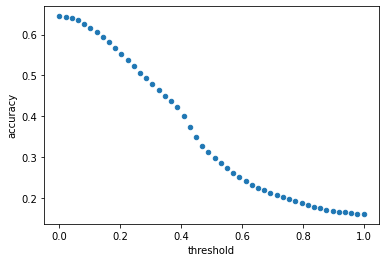

In [179]:
result_df = pd.DataFrame({'threshold':thresh_list, 'accuracy':results})
result_df.plot.scatter(x="threshold",y="accuracy")

In [180]:
result_df.sort_values('accuracy', ascending=False)[0:10]

,threshold,accuracy
0,0.000000,0.644725
1,0.020408,0.644038
2,0.040816,0.640837
3,0.061224,0.635275
4,0.081633,0.626637
5,0.102041,0.616975
6,0.122449,0.605463
7,0.142857,0.593962
8,0.163265,0.580788
9,0.183673,0.566338


In [181]:
entropy_train[0:10]

,bert_entropy,bert_pred,cnn_entropy,cnn_pred,t5_pred,entropy_pred,entropy_min
0,0.485028,4,0.062517,4,5.0,4.0,0.062517
1,0.549362,3,0.700296,4,4.0,4.0,0.549362
2,0.518189,4,0.780883,4,5.0,4.0,0.518189
3,1.179694,2,0.971093,3,4.0,2.0,0.971093
4,0.521290,4,0.885565,3,5.0,3.0,0.521290
5,0.789447,0,0.819576,0,1.0,0.0,0.789447
6,0.557871,4,0.107382,4,5.0,4.0,0.107382
7,0.560315,4,0.815782,3,5.0,3.0,0.560315
8,0.486360,4,0.704559,4,5.0,4.0,0.486360
9,0.667814,3,0.742525,4,4.0,4.0,0.667814


(array([25739., 21411., 11910., 10248.,  5188.,  2547.,  1291.,   782.,
          526.,   358.]),
 array([0.3604258 , 0.50729925, 0.65417269, 0.80104614, 0.94791958,
        1.09479303, 1.24166647, 1.38853992, 1.53541336, 1.6822868 ,
        1.82916025]),
 <a list of 10 Patch objects>)

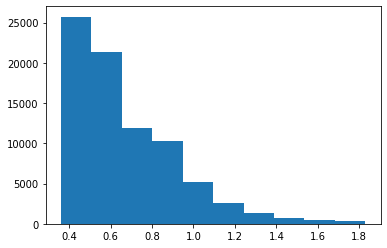

In [182]:
import matplotlib.pyplot as plt
bert_correct = entropy_train['bert_pred'] == train_actuals['Actuals']
plt.hist(entropy_train['bert_entropy'])

(array([ 5607., 11081., 11446., 10107., 12497., 11197.,  9347.,  5194.,
         2263.,  1261.]),
 array([0.00462711, 0.16452005, 0.32441298, 0.48430592, 0.64419885,
        0.80409179, 0.96398473, 1.12387766, 1.2837706 , 1.44366353,
        1.60355647]),
 <a list of 10 Patch objects>)

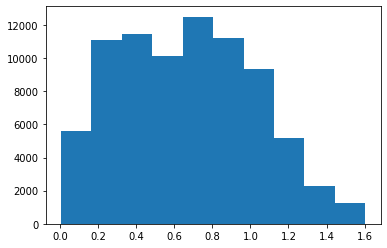

In [183]:
plt.hist(entropy_train['cnn_entropy'])

In [187]:
# Test ignoring T5
accuracy_score(entropy_test['entropy_pred'], test_actuals['Actuals'])

0.15935

In [186]:
entropy_test

,bert_entropy,bert_pred,cnn_entropy,cnn_pred,t5_pred,entropy_pred,entropy_min
0,0.519523,4,0.217971,4,5.0,4.0,0.217971
1,0.498772,4,0.599456,4,5.0,4.0,0.498772
2,0.491002,4,0.438734,4,5.0,4.0,0.438734
3,0.613448,4,0.219012,4,5.0,4.0,0.219012
4,0.695233,4,0.547171,4,2.0,4.0,0.547171
...,...,...,...,...,...,...,...
19995,0.491955,4,0.873050,3,4.0,3.0,0.491955
19996,1.613193,0,1.131522,0,1.0,0.0,1.131522
19997,0.737702,0,1.440986,0,1.0,0.0,0.737702
19998,0.541375,4,0.349648,4,5.0,4.0,0.349648
